In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
x = pd.read_csv("data/x.csv", index_col=0)["0"]
y = pd.read_csv("data/y.csv", index_col=0)["0"]

In [8]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

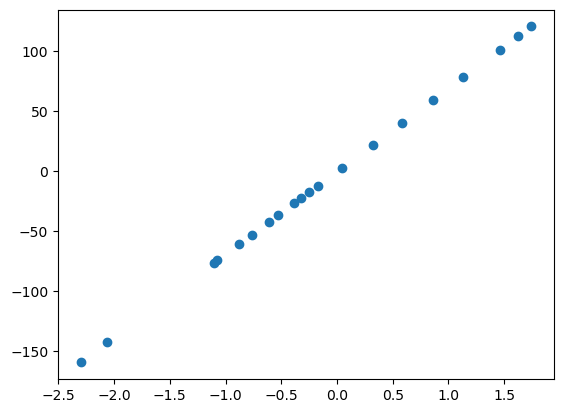

In [14]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [15]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]

        return self.b0 + self.b1 * X

    def error(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]

        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]

        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=1, accuracy=1e-6, max_steps=5000):
        steps, errors = [], []
        step = 0

        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]

        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]

        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if len(errors) > 1:
                if errors[-1] > errors[-2]:
                    return self.fit(
                        X, Y, alpha=alpha / 2, accuracy=accuracy, max_steps=max_steps
                    )

                if abs(errors[-1] - errors[-2]) < accuracy:
                    break

        return steps, errors, alpha

    def plot_prediction(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]

        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]

        plt.figure()
        plt.scatter(X, Y)
        plt.plot(X, self.predict(X), "r")
        plt.show()

error after gradient descent: 4.266159751364291e-06


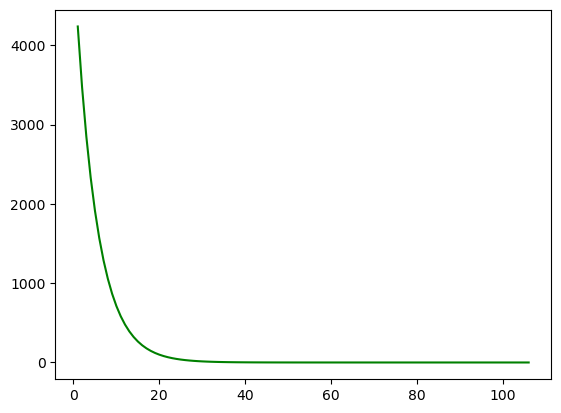

In [16]:
# 1

hyp = Model(100, 100)
steps, errors, alpha = hyp.fit(x, y, alpha=0.1)
J = hyp.error(x, y)
print("error after gradient descent:", J)

plt.figure()
plt.plot(steps, errors, "g")
plt.show()

error after gradient descent: nan


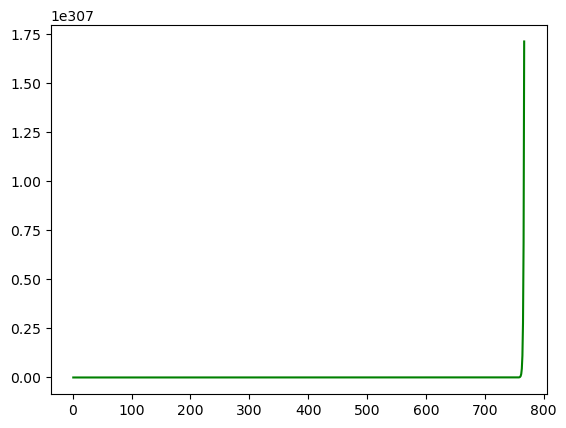

In [17]:
# 2

class Model_prev(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

hyp = Model_prev()
steps, errors = hyp.fit(x, y, alpha=2)
J = hyp.error(x, y)
print("error after gradient descent:", J)

plt.figure()
plt.plot(steps, errors, "g")
plt.show()

In [18]:
# 3

print(type(x))

hyp = Model()
steps, errors, alpha = hyp.fit(x.to_frame(), y.to_frame())
J = hyp.error(x.to_frame(), y.to_frame())
print("error after gradient descent:", J)

<class 'pandas.core.series.Series'>
error after gradient descent: 4.1772608368551725e-08


In [19]:
# 4

hyp = Model()
steps, errors, alpha = hyp.fit(x, y, accuracy=1e-06)
J = hyp.error(x, y)
print("error after gradient descent:", J)
print("steps:", len(steps))

error after gradient descent: 4.1772608368551725e-08
steps: 10


In [20]:
# 5

hyp = Model()
steps, errors, alpha = hyp.fit(x, y, alpha=0.001, accuracy=1e-09)
J = hyp.error(x, y)
print("error after gradient descent:", J)
print("steps:", len(steps))

error after gradient descent: 0.03937321303112905
steps: 5000


In [21]:
# 6

hyp = Model()
steps, errors, alpha = hyp.fit(x, y, alpha=2)
J = hyp.error(x, y)
print("error after gradient descent:", J)
print("steps:", len(steps))
print("alpha:", alpha)

error after gradient descent: 2.161195016152864e-08
steps: 11
alpha: 1.0


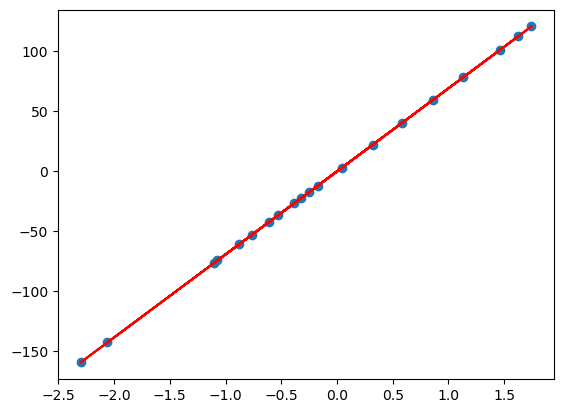

In [22]:
# 7

hyp = Model()
hyp.fit(x, y)
hyp.plot_prediction(x, y)